In [53]:
#import finta as fa
import pandas as pd
import yfinance as yf
import hvplot.pandas
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import talib as TA
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from datetime import date
import os

%matplotlib inline

In [54]:
# List of S&P 500 sector ETFs
etfs = ["XLK","XLY","XLI","XLU","XLB","XLP", "XLF", "XLV", "XLE","DX-Y.NYB"]

In [55]:
# Download the ETF data from Yahoo Finance
data = yf.download(etfs, start="2008-01-01", end="2022-12-31", interval="1d")["Close"]


[*********************100%***********************]  10 of 10 completed


In [56]:
Close_prices= pd.DataFrame(data)
Close_prices.head()

,DX-Y.NYB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,
2008-01-02,75.970001,41.299999,79.500000,23.038179,38.509998,26.120001,28.389999,42.090000,34.939999,32.200001
2008-01-03,75.889999,42.049999,80.440002,22.891958,38.540001,26.160000,28.240000,42.029999,35.150002,31.840000
2008-01-04,75.790001,40.779999,77.500000,22.242081,37.750000,25.139999,28.120001,42.349998,34.790001,30.840000
2008-01-07,76.169998,40.220001,77.199997,22.298944,37.279999,24.920000,28.450001,43.230000,35.480000,30.950001
2008-01-08,76.110001,39.599998,75.849998,21.486595,36.450001,24.260000,28.240000,43.240002,35.770000,30.350000


In [57]:
columns=["US Dollar","Materials" ,"Energy", "Financials", "Industrials","Info Tech","Consumer Staples","Utilities","Healthcare","Consumer Desc"]

In [58]:
Close_prices.columns=columns

In [59]:
Close_prices.head()

,US Dollar,Materials,Energy,Financials,Industrials,Info Tech,Consumer Staples,Utilities,Healthcare,Consumer Desc
Date,,,,,,,,,,
2008-01-02,75.970001,41.299999,79.500000,23.038179,38.509998,26.120001,28.389999,42.090000,34.939999,32.200001
2008-01-03,75.889999,42.049999,80.440002,22.891958,38.540001,26.160000,28.240000,42.029999,35.150002,31.840000
2008-01-04,75.790001,40.779999,77.500000,22.242081,37.750000,25.139999,28.120001,42.349998,34.790001,30.840000
2008-01-07,76.169998,40.220001,77.199997,22.298944,37.279999,24.920000,28.450001,43.230000,35.480000,30.950001
2008-01-08,76.110001,39.599998,75.849998,21.486595,36.450001,24.260000,28.240000,43.240002,35.770000,30.350000


In [60]:
Close_prices.hvplot.line(
    xlabel="Year",
    ylabel="Closing Price"
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

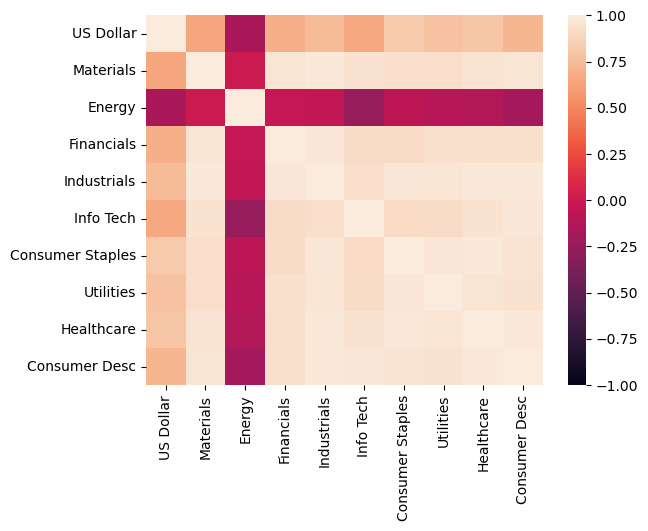

In [64]:
Correlation=Close_prices.corr()
sn.heatmap(Correlation, vmin=-1, vmax=1)

### Calculate Stochastic Indicator for S&P 500 ETF Ticker XLK

In [9]:
# Step 1: Download S&P 500 ETF data using yfinance
ticker = "XLY"
data = yf.download(ticker, start="2008-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [10]:
df= pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200


In [11]:
def generate_signals(df):
    #close = signals_df['Close']
    #high = signals_df['High']
    #low = signals_df['Low']
   # signal
    # Calculate Stochastic Oscillator
    #slowk, slowd = TA.STOCH(high, low, close)
    df['slowk'], df['slowd'] = TA.STOCH(df['High'], df['Low'], df['Close'])
    
    # Generate Buy and Sell signals
    #buy = np.where((slowk > 20) & (slowd > 20), 1,0)
    #sell = np.where((slowk < 80) & (slowd < 80), 1,0)
    
    #signals = np.where(buy == 1, 'Buy', 'Hold')
    #signals = np.where(sell == 1, 'Sell', signals)
    
    # Merge signals into one column 'Signal'
    #signal = np.where(buy == 1, 1, np.where(sell == 1, -1, 0))
    
    return df

# Generate signals
df= generate_signals(df)
# Add signals to data
df['Buy'] = 0
df['Sell']= 0


In [12]:
#display(df['Signal'].value_counts())

#dfCopy=df.copy()

df=df.reset_index()




df['signal']=0
MarketPosition=0

for index, row in df.iterrows():
    
    if index>0:
    

        if(df.loc[index-1, 'slowk']<20 and df.loc[index, 'slowd']>20) and MarketPosition<=0:
            df.loc[index, 'signal']=1
            MarketPosition=1

        if(df.loc[index-1, 'slowk']>80 and df.loc[index, 'slowd']<80) and MarketPosition>=0:
            df.loc[index, 'signal']=-1
            MarketPosition=-1

 
display(df['signal'].value_counts())
df.to_csv('Df_XLK.csv')
df

 0    3400
 1      63
-1      62
Name: signal, dtype: int64

,Date,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,signal
0,2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,0
1,2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,0
2,2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,0
3,2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,0
4,2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3520,2021-12-23,200.660004,203.729996,200.360001,203.190002,201.435272,5294300,78.474703,52.986410,0,0,0
3521,2021-12-27,203.570007,205.789993,203.479996,205.169998,203.398163,4214000,92.068834,74.060760,0,0,0
3522,2021-12-28,205.630005,206.350006,204.910004,205.259995,203.487396,4153100,94.793334,88.445624,0,0,0
3523,2021-12-29,205.759995,206.179993,204.369995,205.669998,203.893860,3792300,93.641707,93.501292,0,0,0


In [13]:
#display(df['quality_signal'].value_counts())

In [14]:
df = df.set_index(df["Date"]).drop(columns=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,signal
Date,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,0
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,0
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,0
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,0
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,0


In [15]:
# Calculate the points in time at which a position should be taken, 1 or -1
df["Entry/Exit"] =df["signal"].diff()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,signal,Entry/Exit
Date,,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,0,NaN
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,0,0.0
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,0,0.0
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,0,0.0
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,0,0.0
2008-01-09,30.219999,30.629999,29.670000,30.570000,24.914114,6711100,NaN,NaN,0,0,0,0.0
2008-01-10,30.389999,31.280001,30.290001,31.000000,25.264561,6124400,NaN,NaN,0,0,0,0.0
2008-01-11,30.590000,30.680000,30.110001,30.260000,24.661474,3961100,NaN,NaN,0,0,0,0.0
2008-01-14,30.280001,30.580000,30.139999,30.549999,24.897816,3004300,53.089216,45.257853,0,0,0,0.0


In [16]:
short_window=50
df['SMA50'] = Close_prices['US Dollar'].rolling(window=short_window).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,signal,Entry/Exit,SMA50
Date,,,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,0,NaN,NaN
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,0,0.0,NaN
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,0,0.0,NaN
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,0,0.0,NaN
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,0,0.0,NaN


In [17]:
# Visualize entry position relative to close price
entry =df[df["signal"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = df[df["signal"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avg = df[["SMA50"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * entry * exit * moving_avg
entry_exit_plot

# Show the plot with a title
entry_exit_plot.opts(
    title= "XLK -Entry and Exit Points with US Dollar 50 period MA"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (SMA50)

In [18]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

In [19]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
df['Position'] = share_size * df['signal']

In [20]:
# Determine the points in time where a 500 share position is bought or sold
df['Entry/Exit Position'] = df['Position'].diff()

In [21]:
# Multiply the close price by the number of shares held, or the Position
df['Portfolio Holdings'] = df['Close'] * df['Position']

In [22]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
df['Portfolio Cash'] = initial_capital - (df['Close'] * df['Entry/Exit Position']).cumsum() 

In [23]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
df['Portfolio Total'] = df['Portfolio Cash'] + df['Portfolio Holdings']

In [24]:
# Calculate the portfolio daily returns
df['Portfolio Daily Returns'] = df['Portfolio Total'].pct_change()
df['Portfolio Daily Returns']

Date
2008-01-02    NaN
2008-01-03    NaN
2008-01-04    0.0
2008-01-07    0.0
2008-01-08    0.0
             ... 
2021-12-23    0.0
2021-12-27    0.0
2021-12-28    0.0
2021-12-29    0.0
2021-12-30    0.0
Name: Portfolio Daily Returns, Length: 3525, dtype: float64

In [25]:
# Calculate the portfolio cumulative returns
df['Portfolio Cumulative Returns'] = (1 + df['Portfolio Daily Returns']).cumprod() - 1
display(df['Portfolio Cumulative Returns'].sum())
display(df['Portfolio Daily Returns'].sum())

64.20717830657856

0.06956696879126856

In [26]:
# Print the DataFrame
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,signal,Entry/Exit,SMA50,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,NaN,NaN
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-09,30.219999,30.629999,29.670000,30.570000,24.914114,6711100,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-10,30.389999,31.280001,30.290001,31.000000,25.264561,6124400,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-11,30.590000,30.680000,30.110001,30.260000,24.661474,3961100,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-14,30.280001,30.580000,30.139999,30.549999,24.897816,3004300,53.089216,45.257853,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0


In [27]:
df.to_csv('C:/Users/ABUZAR/FINTECHMAIN/project3/portfofio.csv')

In [28]:
# Visualize exit position relative to total portfolio value
exit = df[df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    #color='red',
    #marker='v',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = df[df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    #color='green',
   # marker='^',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
total_portfolio_value = df[['Portfolio Total']].hvplot(
    line_color='navy',
    ylabel='Total Portfolio Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="XLK Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,signal,Entry/Exit,SMA50,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
Date,,,,,,,,,,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,0,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,NaN,NaN
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,0,0.0,NaN,0,0.0,0.0,100000.0,100000.0,0.0,0.0


In [30]:
df['mid']=(df['High']+df['Low'])/2
df['Y']=df['mid'].pct_change().shift(-1)

for index, row in df.iterrows():
    
    if df.loc[index, 'Y']>0:
        df.loc[index, 'Y']=1
    else:
        df.loc[index, 'Y']=0 




df['MA14Slope']=df['Close'].rolling(14).mean().pct_change()
df['ZScore14']=(df['Close']-df['Close'].rolling(14).mean())/df['Close'].rolling(14).std()
df

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,...,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,mid,Y,MA14Slope,ZScore14
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,...,NaN,0.0,NaN,NaN,NaN,NaN,32.550001,0.0,NaN,NaN
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,...,0.0,0.0,100000.000000,100000.000000,NaN,NaN,31.950001,0.0,NaN,NaN
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,...,0.0,0.0,100000.000000,100000.000000,0.0,0.00000,31.155000,0.0,NaN,NaN
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,...,0.0,0.0,100000.000000,100000.000000,0.0,0.00000,30.930000,0.0,NaN,NaN
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,...,0.0,0.0,100000.000000,100000.000000,0.0,0.00000,30.800000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,200.660004,203.729996,200.360001,203.190002,201.435272,5294300,78.474703,52.986410,0,0,...,0.0,0.0,106965.006828,106965.006828,0.0,0.06965,202.044998,1.0,0.001262,0.593006
2021-12-27,203.570007,205.789993,203.479996,205.169998,203.398163,4214000,92.068834,74.060760,0,0,...,0.0,0.0,106965.006828,106965.006828,0.0,0.06965,204.634995,1.0,0.001154,0.952884
2021-12-28,205.630005,206.350006,204.910004,205.259995,203.487396,4153100,94.793334,88.445624,0,0,...,0.0,0.0,106965.006828,106965.006828,0.0,0.06965,205.630005,0.0,-0.000491,1.020977


In [31]:
#df['Returns']= (df['Open']+df['High']+df['Low']+df['Close'])/4
df['Returns']= df['Close']
  # Annualized volatility of the option returns for Google
df['Actual Returns']= df['Returns'].pct_change()

annualized_volatility = round(df["Actual Returns"].std() * np.sqrt(252) * 100, 2)

# Display results
print("Annualized Volatility:", annualized_volatility, '%')                     

Annualized Volatility: 22.41 %


In [32]:
df['Pivot']=(df['High']+df['Low']+df['Close'])/3


In [33]:
df['FuturePivot']=df['Pivot'].shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd,Buy,Sell,...,Portfolio Daily Returns,Portfolio Cumulative Returns,mid,Y,MA14Slope,ZScore14,Returns,Actual Returns,Pivot,FuturePivot
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,32.990002,32.990002,32.110001,32.200001,26.242550,3901000,NaN,NaN,0,0,...,NaN,NaN,32.550001,0.0,NaN,NaN,32.200001,NaN,32.433334,31.913334
2008-01-03,32.099998,32.220001,31.680000,31.840000,25.949150,9587000,NaN,NaN,0,0,...,NaN,NaN,31.950001,0.0,NaN,NaN,31.840000,-0.011180,31.913334,31.050000
2008-01-04,31.580000,31.580000,30.730000,30.840000,25.134163,5985100,NaN,NaN,0,0,...,0.0,0.0,31.155000,0.0,NaN,NaN,30.840000,-0.031407,31.050000,30.936667
2008-01-07,31.139999,31.180000,30.680000,30.950001,25.223812,6121900,NaN,NaN,0,0,...,0.0,0.0,30.930000,0.0,NaN,NaN,30.950001,0.003567,30.936667,30.650000
2008-01-08,31.030001,31.309999,30.290001,30.350000,24.734821,4300200,NaN,NaN,0,0,...,0.0,0.0,30.800000,0.0,NaN,NaN,30.350000,-0.019386,30.650000,30.290000


In [34]:
# Assign a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
X = df[["slowk", "slowd","MA14Slope","ZScore14"]].shift().dropna().copy()



# Display sample data
display(X.head())
display(X.tail())
X.to_csv("X.csv")

,slowk,slowd,MA14Slope,ZScore14
Date,,,,
2008-01-24,62.175085,35.890362,-0.002337,1.114062
2008-01-25,92.922207,62.060048,-0.000773,1.786124
2008-01-28,91.027040,82.041444,0.000047,0.660032
2008-01-29,88.402062,90.783769,0.000984,1.400437
2008-01-30,83.939001,87.789368,0.002622,1.327723


,slowk,slowd,MA14Slope,ZScore14
Date,,,,
2021-12-23,51.638743,31.908693,-0.001140,0.023986
2021-12-27,78.474703,52.986410,0.001262,0.593006
2021-12-28,92.068834,74.060760,0.001154,0.952884
2021-12-29,94.793334,88.445624,-0.000491,1.020977
2021-12-30,93.641707,93.501292,-0.000530,1.175913


In [35]:
# Copy the new "signal" column to a new Series called `y`.
y = df["Y"].copy()

### Split the Data into Training and Testing Sets

In [36]:
# Import required libraries
from pandas.tseries.offsets import DateOffset

In [37]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2008-01-24 00:00:00


In [38]:
# Select the ending period for the training data with an offset of 18 months
training_end = X.index.min() + DateOffset(months=115)

# Display the training end date
print(training_end)

2017-08-24 00:00:00


In [39]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [40]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

### Standardize the Data

In [41]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

In [42]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Using Machine Learning Into a Trading Strategy

In [43]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [44]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [45]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print(training_report)

              precision    recall  f1-score   support

         0.0       0.58      0.12      0.20      1111
         1.0       0.55      0.92      0.69      1304

    accuracy                           0.55      2415
   macro avg       0.56      0.52      0.45      2415
weighted avg       0.56      0.55      0.47      2415



#### Backtesting a Machine Learning Trading Algorithm

In [46]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [47]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

         0.0       0.44      0.11      0.18       458
         1.0       0.58      0.90      0.71       638

    accuracy                           0.57      1096
   macro avg       0.51      0.51      0.44      1096
weighted avg       0.53      0.57      0.49      1096



#### Visually Compare the Actual and Predicted Returns

In [48]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = df["Actual Returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2017-08-24,1.0,-0.002144,-0.002144
2017-08-25,1.0,0.002488,0.002488
2017-08-28,1.0,0.000564,0.000564
2017-08-29,1.0,-0.000902,-0.000902
2017-08-30,1.0,0.007223,0.007223


<AxesSubplot:xlabel='Date'>

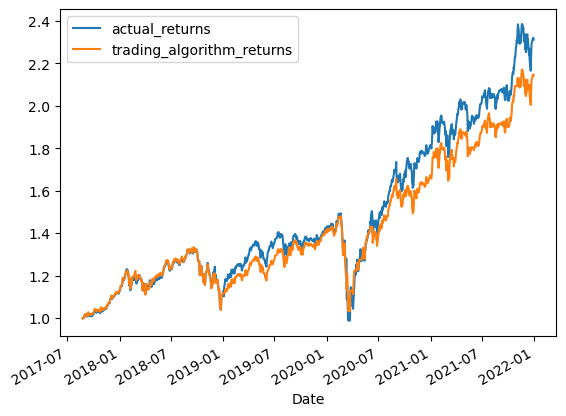

In [49]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()